In [148]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [149]:
stainless_df = pd.read_csv("../data/Steel- Property and Composition (Stainless Steel).csv", encoding="windows-1253" )

In [150]:
stainless_df.head(20)

,SAE Grade,Conditions,UTS (MPa),UTS (Ksi),YS (MPa),YS (ksi),Elongation (%),Reduction (%),Hardness (HB),C (Min),...,Si (Max),Ni (Min),Ni (Max),Cr (Min),Cr (Max),Mo (Min),Mo (Max),Ti (Min),Ti (Max),N
0,Ferritic stainless steels(b),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,405,Annealed bar,483.0,70.0,276.0,40.0,30.0,60,150.0,NaN,...,1.0,NaN,NaN,NaN,13.00,NaN,NaN,NaN,NaN,NaN
2,405,Cold drawn bar,586.0,85.0,483.0,70.0,20.0,60,185.0,NaN,...,1.0,NaN,NaN,NaN,13.00,NaN,NaN,NaN,NaN,NaN
3,409,Annealed bar,450.0,65.0,240.0,35.0,25.0,-,135.0,NaN,...,1.0,NaN,NaN,NaN,11.13,NaN,NaN,NaN,0.75,NaN
4,430,Annealed bar,517.0,75.0,310.0,45.0,30.0,65,155.0,NaN,...,1.0,NaN,NaN,14.0,18.00,NaN,NaN,NaN,NaN,NaN
5,442,Annealed bar,515.0,75.0,310.0,45.0,30.0,50,160.0,NaN,...,1.0,NaN,1.00,NaN,20.50,NaN,NaN,NaN,NaN,NaN
6,442,Annealed at 815 °C (1500 °F) and cold worked,545.0,79.0,427.0,62.0,35.5,79,191.0,NaN,...,1.0,NaN,1.00,NaN,20.50,NaN,NaN,NaN,NaN,NaN
7,446,Annealed bar,550.0,80.0,345.0,50.0,25.0,45,167.0,NaN,...,1.0,NaN,0.25,23.0,27.00,NaN,NaN,NaN,NaN,NaN
8,446,Annealed at 815 °C (1500 °F) and cold drawn,607.0,88.0,462.0,67.0,26.0,64,216.0,NaN,...,1.0,NaN,0.25,23.0,27.00,NaN,NaN,NaN,NaN,NaN
9,Martensitic stainless steels(b),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [151]:
stainless_df["Conditions"].unique()

array([nan, 'Annealed bar', 'Cold drawn bar',
       'Annealed at 815 °C (1500 °F) and cold worked',
       'Annealed at 815 °C (1500 °F) and cold drawn', 'Tempered bar',
       'Oil quenched from 980 °C (1800 °F); tempered at 540 °C (1000 °F); 16 mm (0.625 in.) bar',
       'Oil quenched from 980 °C (1800 °F); tempered at 40 °C (104 °F); 16 mm (0.625 in.) bar',
       'Oil quenched from 980 °C (1800 °F);\ntempered at 650 °C (1200 °F)',
       'Annealed and cold drawn',
       'Oil quenched from 980°C (1800 °F); tempered at 40 °C (104 °F)',
       'Annealed and cold drawn bar', 'Hardened and tempered at 315 °C',
       'Annealed', '50% hard', 'Full hard', 'Extra hard',
       'Annealed sheet', '50% hard sheet', 'Annealed strip',
       '25% hard strip', 'Cold drawn', 'Cold-drawn high tensile',
       'Annealed and cold-drawn bar', 'Annealed wire 1040 °C (1900 °F)'],
      dtype=object)

In [152]:
stainless_df["Conditions"].head(20)

0                                                   NaN
1                                          Annealed bar
2                                        Cold drawn bar
3                                          Annealed bar
4                                          Annealed bar
5                                          Annealed bar
6          Annealed at 815 °C (1500 °F) and cold worked
7                                          Annealed bar
8           Annealed at 815 °C (1500 °F) and cold drawn
9                                                   NaN
10                                         Annealed bar
11                                         Tempered bar
12    Oil quenched from 980 °C (1800 °F); tempered a...
13    Oil quenched from 980 °C (1800 °F); tempered a...
14                                         Annealed bar
15                                       Cold drawn bar
16    Oil quenched from 980 °C (1800 °F);\ntempered ...
17                                         Annea

In [153]:
stainless_sorted = stainless_df.drop(
    columns={
        "C (Min)", "Si (Min)",
        "Si (Max)", "Ni (Min)",
        "Ni (Max)", "P (Min)",
        "P (Max)", "S (Min)",
        "S(Max)", "Cr (Min)",
        "Cr (Max)", "Mo (Min)",
        "Mo (Max)", "Ti (Min)",
        "Ti (Max)", "Mn (Min)",
        "Mn (Max)", "UTS (MPa)",
        "YS (MPa)", "N"
        }, index={0,9,26,62,63,64})

In [154]:


stainless_sorted = stainless_sorted.dropna(axis=0)
stainless_sorted["Reduction (%)"] = stainless_sorted["Reduction (%)"].str.replace("-","0").astype("float64")



In [156]:
stainless_sorted.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34 entries, 1 to 61
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SAE Grade       34 non-null     object 
 1   Conditions      34 non-null     object 
 2   UTS (Ksi)       34 non-null     float64
 3   YS (ksi)        34 non-null     float64
 4   Elongation (%)  34 non-null     float64
 5   Reduction (%)   34 non-null     float64
 6   Hardness (HB)   34 non-null     float64
 7   C (Max)         34 non-null     float64
dtypes: float64(6), object(2)
memory usage: 2.4+ KB


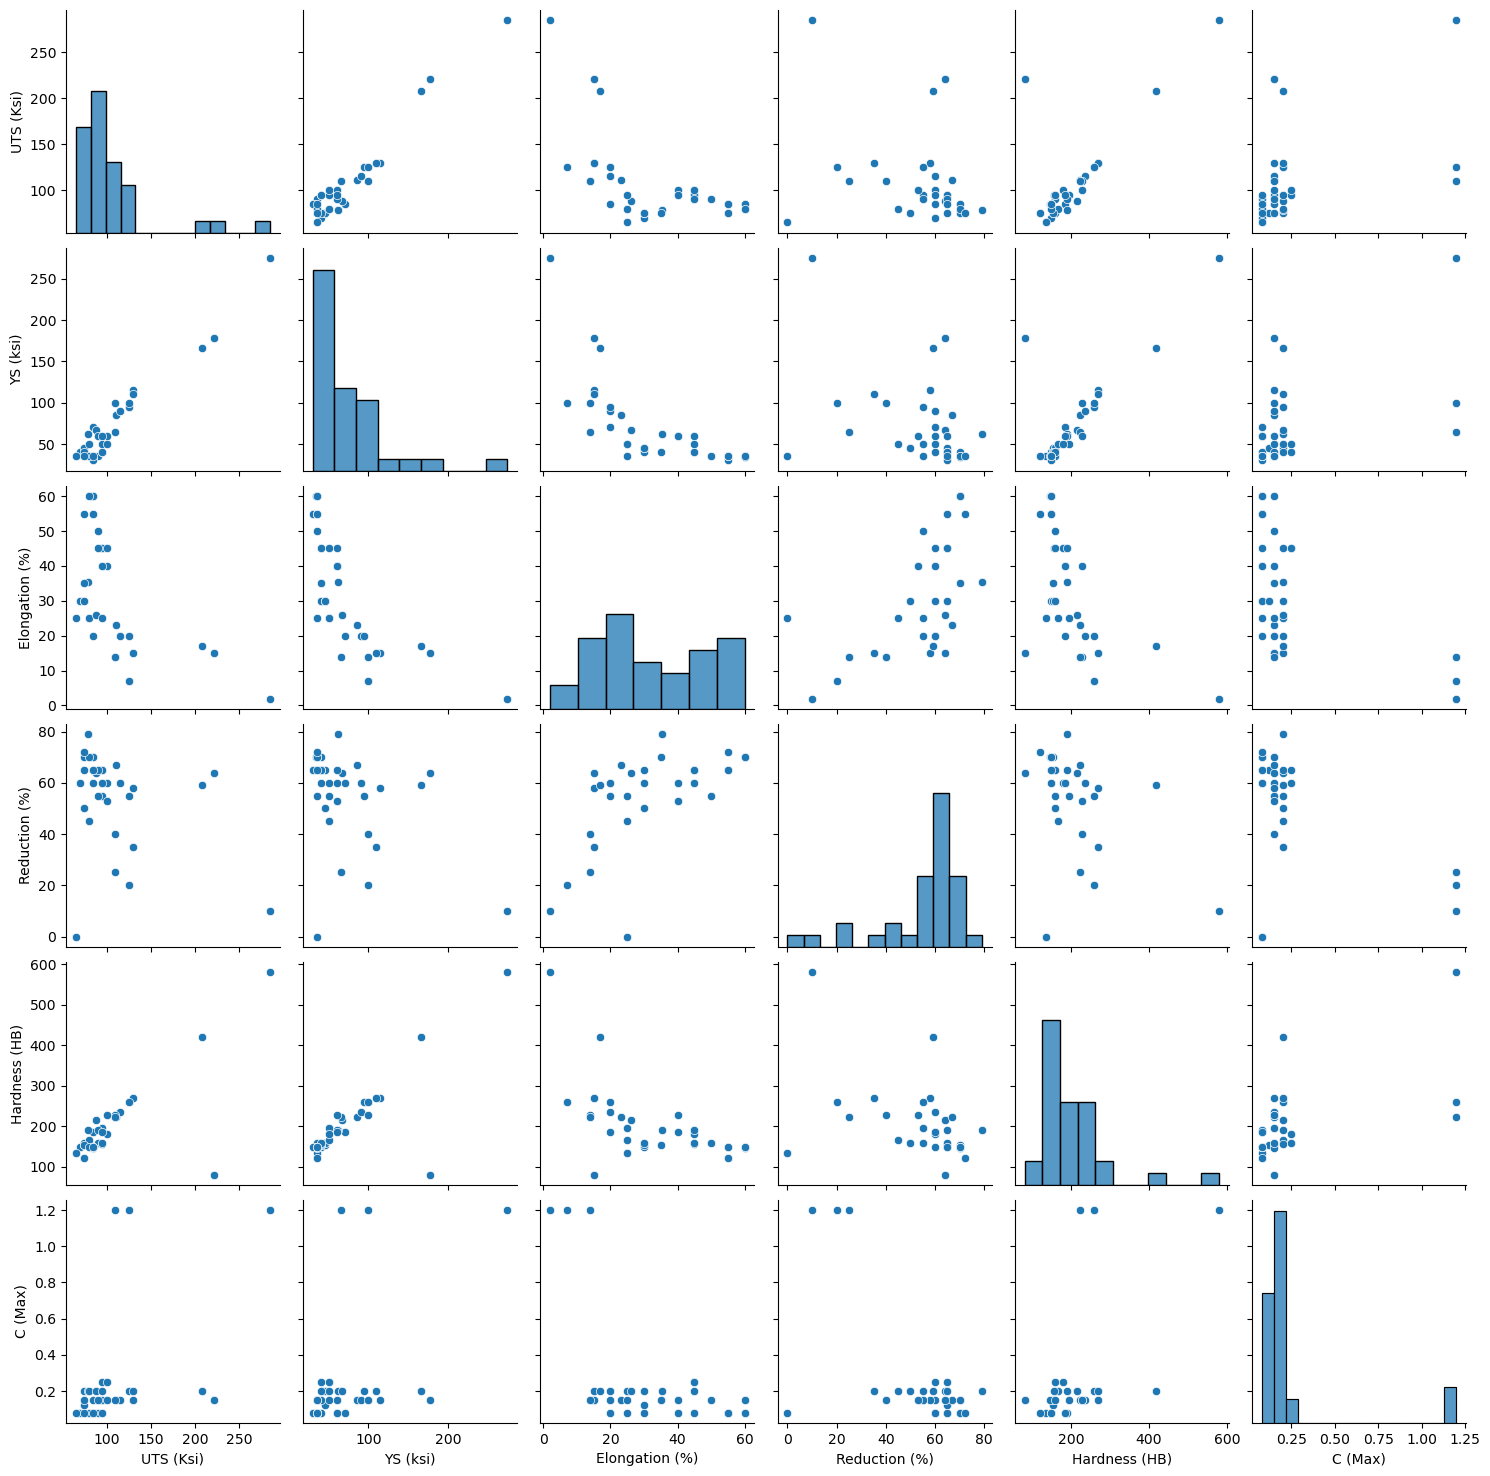

In [157]:
sns.pairplot(stainless_sorted)


In [ ]:
stainless_sorted

In [ ]:
stainless_sorted["Reduction (%)"]